POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>
(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


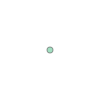

Distance between the points is 29.72 decimal degrees


In [17]:
from shapely.geometry import Point, LineString, Polygon
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)
point_type = type(point1)
print(point1)
print(point3D)
print(type(point1))

point_coords = point1.coords
type(point_coords)

# Get x and y coordinates
xy = point_coords.xy
# Get only x coordinates of Point1
x = point1.x
# Whatabout y coordinate?
y = point1.y

print(xy)

print(x)
print(y)

display(point2)



# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))


In [20]:
#Side note on distances in GIS

# law of cosines - determines the great-circle distance between two points on a sphere given their longitudes and latitudes based on "basic math"
import math

distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6378

print( "{0:8.4f} for equatorial radius in km".format(distance))


distance = math.acos(math.sin(math.radians(point1.y))*math.sin(math.radians(point2.y))+math.cos(math.radians(point1.y))*math.cos(math.radians(point2.y))*math.cos(math.radians(point2.x)-math.radians(point1.x)))*6356

print( "{0:8.4f} for polar radius in km".format(distance))



# with pyproj - projection library
import pyproj

geod = pyproj.Geod(ellps='WGS84')

angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

print ("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

3306.1044 for equatorial radius in km
3294.7004 for polar radius in km
3286.3538 for ellipsoid WGS84 in km


In [36]:
#LineString

# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome = a list of tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])


for i in line2:
    print (i)

print(line)
print(line2)

type(line)

# Get x and y coordinates of the line
lxy = line.xy

print(lxy)




# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print(line_x)

print(line_y)


display(line2)






# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid
display(l_centroid)

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))


print("Centroid of our line: ", l_centroid)


print("Type of the centroid:", centroid_type)


TypeError: 'LineString' object is not iterable

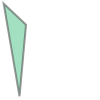

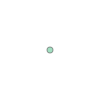

Pol area is 86.78900000000002 units


NameError: name 'coord_lst' is not defined

In [45]:
# Polygon

# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
display(poly)
display(poly.centroid)
print ("Pol area is "+str(poly.area)+" units")

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
pol_list=[point1, point2, point3]

for p in pol_list:
    tup=(p.x, p.y)
    coord_lst.append(tup)
print (coord_lst)

poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)

print(poly2)


print("Geometry type as text:", poly_type)


print("Geometry how Python shows it:", poly_type2)


In [53]:
poly2
poly2.exterior.xy
for line in poly2.exterior.xy:
    for single_coord in line:
        print(single_coord)

2.2
7.2
9.26
2.2
4.2
-25.1
-2.456
4.2


POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
(-180.0, -90.0, 180.0, 90.0)
Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)


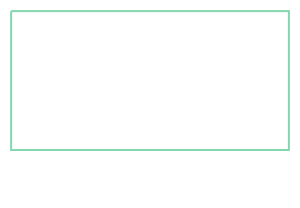

Poly Exterior Length:  1080.0


In [65]:
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

print(world)
print(world_has_a_hole)
type(world_has_a_hole)

world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length
print(world_bbox)




print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
display(world_ext)
print("Poly Exterior Length: ", world_ext_length)


In [81]:
# Reading X/Y Coordinates from Text files
import pandas as pd
df = pd.read_csv(r'C:\Users\daiga86\geopython\L1\global-city-population-estimates.csv', sep=';', encoding='latin1')

# this option tells pandas to print up to 20 columns, typically a the print function will cut the output for better visibility
# (depending on the size and dimension of the dataframe)
pd.set_option('max_columns',20)

print(df.head(5))

def make_point(row):
    return Point(row['Longitude'], row['Latitude'])


df['points'] = df.apply(make_point, axis=1)

print(df.head(5))



  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           